Pair Programming Preprocesado


Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('datos/books_prepr_datos.csv', index_col=0)
df.head()

,genre,user_rating,reviews,price,year,author_American Psychological Association,author_Dr. Seuss,author_Gallup,author_Gary Chapman,author_Jeff Kinney,author_Rick Riordan,author_Rob Elliott,author_Stephen R. Covey,author_Stephenie Meyer,author_Suzanne Collins
0,1,-0.806534,0.025759,0.140900,-1.347319,0,0,0,0,0,0,0,0,1,0
1,1,0.841223,-0.667585,-1.710289,-0.657318,0,0,0,0,1,0,0,0,0,0
2,1,0.017345,1.717631,-0.143898,-1.002318,0,0,0,0,0,0,0,0,0,1
3,1,0.017345,1.717631,-0.143898,-0.657318,0,0,0,0,0,0,0,0,0,1
4,1,0.017345,1.717631,-0.143898,-0.312317,0,0,0,0,0,0,0,0,0,1


Realizar el ajuste o ajustes de los modelos


In [3]:
# separamos los datos en X e y

X1 = df.drop("genre", axis = 1)
y1 = df["genre"]

In [4]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [5]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [6]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
66,0,0,Train
15,0,0,Train
78,1,1,Train
79,1,1,Train
30,1,1,Train


Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.
Happy coding 📊📈📉

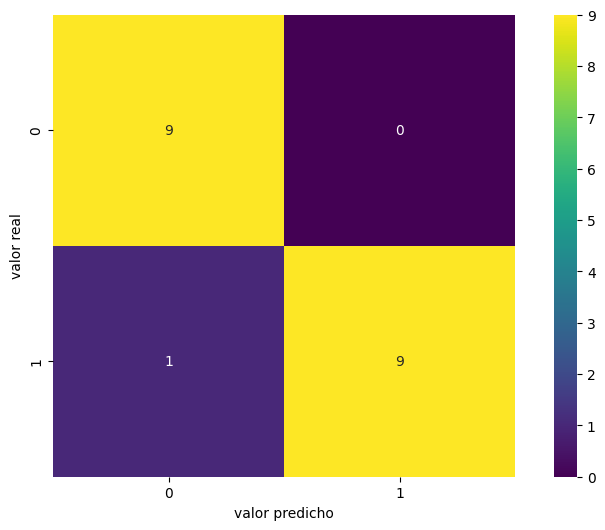

In [7]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y  ESTANDARIZADOS

mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (10, 6))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Gracias a la información que nos aporta el heatmap podemos comprobar que nustro modelo de predicción funciona correctamente ya que no nos da ningun falso positivo y solamente un falso negativo:


In [8]:
resultados.to_csv('./datos/books_ajustes.csv')

Pair pragramming 4 -Metricas

In [9]:



# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


Calculad las métricas para vuestro modelo

In [10]:
# vamos a hacernos una función para sacar las métricas igual que hicimos con al regresión lineal.


def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [11]:
results_logistic_esta = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica Esta")
results_logistic_esta

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.947368,1.0,0.9,0.947368,0.895028,test,Regresión logistica Esta
1,1.000000,1.0,1.0,1.000000,1.000000,train,Regresión logistica Esta


In [12]:
results_logistic_esta.to_csv('./datos/books_log_reg.csv')

Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?
Happy coding 📊📈📉

**Interpretemos ahora los resultados** 


Si miramos los datos del test: 

- *Accuracy*: nuestro modelo acierta el 94% de la veces. 

- *Precision*:  tenemos un valor de 1, ¿esto que significa? que nuestro modelo se equivocará un 0% de las veces que prediga que un autos escriba ficción o no.

- *Recall*: tenemos un valor de 0.9. Es decir, nuestro modelo es capaz de identificar un 90% de los autores que son de ficción.
  
- *kappa* tenemos un valor de 0.89. Esto en realidad nos esta diciendo que la concordancia de nuestros datos es muy bueno, es decir, que nuestro modelo esta acertando en sus predicciones por el propio aprendizaje del modelo. 
